In [ ]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 3.0 MB 28.2 MB/s 
     |████████████████████████████████| 454 kB 45.3 MB/s 
     |████████████████████████████████| 2.9 MB 30.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

### Download the dataset

In [ ]:
!pip install opendatasets
import matplotlib.pyplot as plt

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/paultimothymooney/kermany2018")

100%|██████████| 10.8G/10.8G [01:48<00:00, 107MB/s]


### visualizing the data

In [ ]:
import numpy as np  
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
print(os.listdir("/content/kermany2018/OCT2017 /test/"))

['DME', 'CNV', 'NORMAL', 'DRUSEN']


In [ ]:
test_path = "/content/kermany2018/OCT2017 /test/"
classes = os.listdir(test_path)
print('classes: ', classes)

def display_images(random_number):
    for i in classes:
        new_path = test_path + i
        image_path = new_path + '/' + os.listdir(new_path)[random_number]
        plt.title(i)
        plt.imshow(plt.imread(image_path))
        plt.show()

classes:  ['DME', 'CNV', 'NORMAL', 'DRUSEN']


In [ ]:
train_path = "/content/kermany2018/OCT2017 /train/"
classes = os.listdir(train_path)
print('classes: ', classes)

def display_train_images(random_number):
    for i in classes:
        new_path = train_path + i
        image_path = new_path + '/' + os.listdir(new_path)[random_number]
        plt.title(i)
        plt.imshow(plt.imread(image_path))
        plt.show()

classes:  ['DME', 'CNV', 'NORMAL', 'DRUSEN']


In [ ]:
val_path = "/content/kermany2018/OCT2017 /val/"
classes = os.listdir(val_path)
print('classes: ', classes)

def display_val_images(random_number):
    for i in classes:
        new_path = val_path + i
        image_path = new_path + '/' + os.listdir(new_path)[random_number]
        plt.title(i)
        plt.imshow(plt.imread(image_path))
        plt.show()

classes:  ['DME', 'CNV', 'NORMAL', 'DRUSEN']


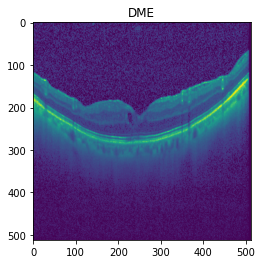

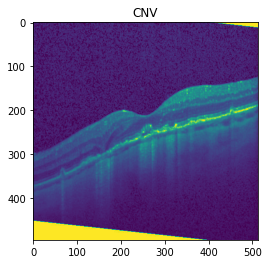

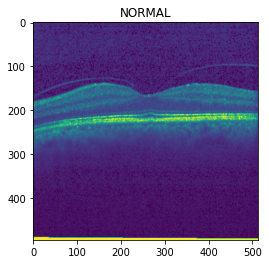

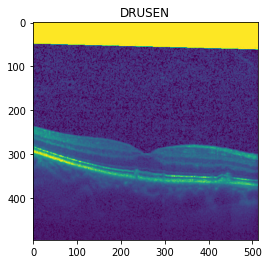

In [ ]:
display_train_images(500)

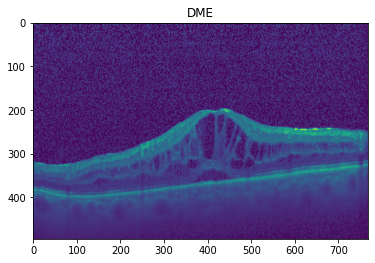

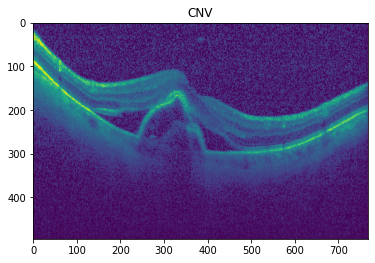

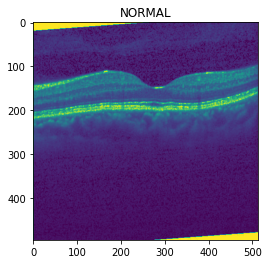

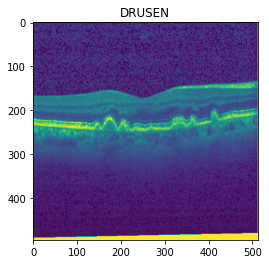

In [ ]:
display_images(100)

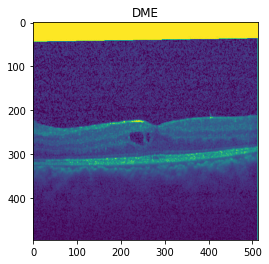

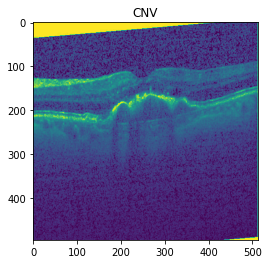

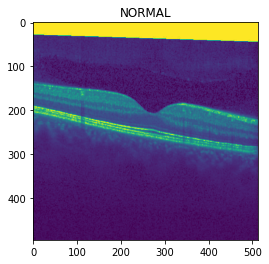

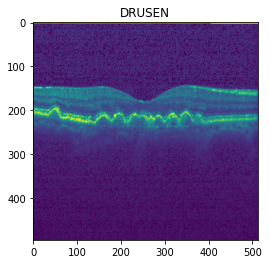

In [ ]:
display_val_images(1)

### Counting the classes and the images

In [ ]:
def count_images(path, classes):
    class_count = []
    for i in classes:
        class_count.append(len(os.listdir(train_path + i)))
        
    df = pd.DataFrame(columns = ["Class_Name", "No of Images"])
    df['Class_Name'] = classes
    df["No of Images"] = class_count
    return df
count_images(test_path , classes)

,Class_Name,No of Images
0,DME,11348
1,CNV,37205
2,NORMAL,26315
3,DRUSEN,8616


In [ ]:
count_images(test_path, classes)

,Class_Name,No of Images
0,DME,11348
1,CNV,37205
2,NORMAL,26315
3,DRUSEN,8616


In [ ]:
def count_images(path, classes):
    class_count = []
    for i in classes:
        class_count.append(len(os.listdir(train_path + i)))
        
    df = pd.DataFrame(columns = ["Class_Name", "No of Images"])
    df['Class_Name'] = classes
    df["No of Images"] = class_count
    return df

In [ ]:
def count_images(path, classes):
    class_count = []
    for i in classes:
        class_count.append(len(os.listdir(val_path + i)))
        
    df = pd.DataFrame(columns = ["Class_Name", "No of Images"])
    df['Class_Name'] = classes
    df["No of Images"] = class_count
    return df

count_images(val_path , classes)

,Class_Name,No of Images
0,DME,8
1,CNV,8
2,NORMAL,8
3,DRUSEN,8


In [ ]:
def image_extensions(classes):
    
    
    for label in classes:
        extensions = []
        for img in os.listdir(test_path + label):
            extensions.append(img.split('.')[-1])
        print("class: ", label)
        print("extensions: ", list(set(extensions)))

In [ ]:
image_extensions(classes)

class:  DME
extensions:  ['jpeg']
class:  CNV
extensions:  ['jpeg']
class:  NORMAL
extensions:  ['jpeg']
class:  DRUSEN
extensions:  ['jpeg']


## Height and width of the images

In [ ]:
def image_size(classes):
    
    for label in classes:
        ht, wd,  = [], [],
        for img in os.listdir(test_path + label):
            
            im = plt.imread(test_path + label + '/' + img)
            
            ht.append(im.shape[0])
            wd.append(im.shape[1])
            
            
        print("class: ", label)
        print("average height is {}, average width is {}:".format(sum(ht)/len(ht), sum(wd)/len(wd)))

In [ ]:
image_size(classes)

class:  DME
average height is 496.0, average width is 628.3636363636364:
class:  CNV
average height is 496.0, average width is 580.7603305785124:
class:  NORMAL
average height is 496.0, average width is 527.8677685950413:
class:  DRUSEN
average height is 496.0, average width is 550.0826446280992:


### Importing tensorflow dependencies

In [ ]:
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam as adam_v2

In [ ]:
initial_lr = 0.0001
epochs = 10


### Vgg model structure

In [ ]:
def vgg_model():
    
    vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))
    
    model = Sequential()
    model.add(vgg)
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.3))
    model.add(Dense(4, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = adam_v2(lr = initial_lr, decay = initial_lr/epochs),
                 metrics = ["accuracy"])
    
    return model

In [ ]:
vgg16_model = vgg_model()
vgg16_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 21,138,500
Non-trainable params: 0
_________________________________________________________________


In [ ]:
image_size = (224, 224)

### data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
data_generator = ImageDataGenerator(rotation_range = 40,
                                         width_shift_range = 0.2, 
                                         height_shift_range = 0.2,
                                         rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True,
                                         fill_mode = 'nearest',
                                         validation_split = 0.25)
train_dataset = data_generator.flow_from_directory(train_path,
                                                  target_size = (224,224),
                                                  class_mode = "categorical",
                                                  batch_size = 64,
                                                  subset = "training")

val_dataset = data_generator.flow_from_directory(val_path,
                                                  target_size = (224,224),
                                                  class_mode = "categorical",
                                                  batch_size = 64,
                                                  subset = "validation")




Found 62614 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [ ]:
def visualize_generator_data(img_count):
    
    for val in range(img_count):
        img, label = val_dataset.next()
        
        print("image shape is: ", img.shape)
        plt.imshow(img[0])
        
        print(img[4].shape)
        plt.show()

image shape is:  (8, 224, 224, 3)
(224, 224, 3)


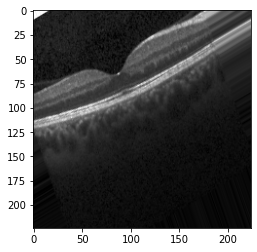

image shape is:  (8, 224, 224, 3)
(224, 224, 3)


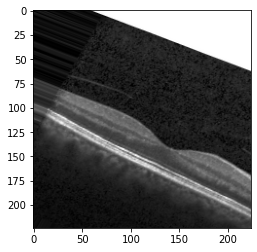

image shape is:  (8, 224, 224, 3)
(224, 224, 3)


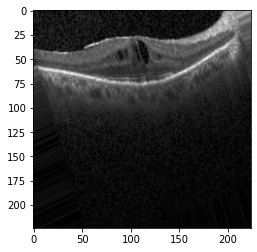

image shape is:  (8, 224, 224, 3)
(224, 224, 3)


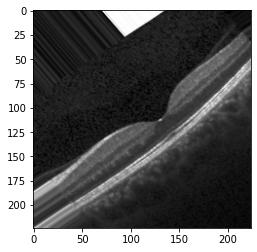

In [ ]:
visualize_generator_data(4)

#### Training the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint=  ModelCheckpoint( 'vggmodel.h5', verbose=1, save_best_only=True)
earlystopping = EarlyStopping(patience=3)
history = vgg16_model.fit(train_dataset,
                          epochs= epochs,
                          validation_data = val_dataset,
                        callbacks = [checkpoint, earlystopping],
                         verbose = True)

Epoch 1/5
979/979 [==============================] - ETA: 0s - loss: 0.3883 - accuracy: 0.8656
Epoch 00001: val_loss improved from inf to 0.01885, saving model to vggmodel.h5
979/979 [==============================] - 1655s 2s/step - loss: 0.3883 - accuracy: 0.8656 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 2/5
979/979 [==============================] - ETA: 0s - loss: 0.1869 - accuracy: 0.9396
Epoch 00002: val_loss improved from 0.01885 to 0.00686, saving model to vggmodel.h5
979/979 [==============================] - 1623s 2s/step - loss: 0.1869 - accuracy: 0.9396 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 3/5
979/979 [==============================] - ETA: 0s - loss: 0.1577 - accuracy: 0.9479
Epoch 00003: val_loss improved from 0.00686 to 0.00363, saving model to vggmodel.h5
979/979 [==============================] - 1609s 2s/step - loss: 0.1577 - accuracy: 0.9479 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 4/5
979/979 [==============================] - ETA: 0s - loss:

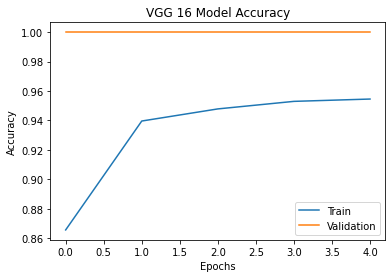

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("VGG 16 Model Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

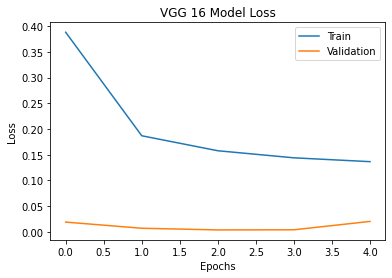

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("VGG 16 Model Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [ ]:
predictions = vgg16_model.predict_generator(val_dataset)
predictions

Instructions for updating:
Please use Model.predict, which supports generators.


array([[9.9706489e-01, 2.8915687e-03, 1.9694942e-06, 4.1501655e-05],
       [4.9315320e-05, 1.0923182e-03, 1.2713774e-03, 9.9758697e-01],
       [9.9893218e-01, 2.0187988e-04, 8.2616182e-04, 3.9750954e-05],
       [3.9988950e-05, 9.5940632e-04, 9.4509975e-04, 9.9805546e-01],
       [1.2624655e-04, 9.9982846e-01, 3.7078330e-06, 4.1598632e-05],
       [2.0929739e-02, 2.0901376e-05, 9.7902703e-01, 2.2266720e-05],
       [6.0581340e-05, 9.9992692e-01, 2.6121702e-06, 9.8682540e-06],
       [1.2994693e-02, 2.3364115e-05, 9.8697567e-01, 6.3681005e-06]],
      dtype=float32)

In [ ]:
predicted_class = np.argmax(predictions, axis = 1)
predicted_class

array([0, 3, 0, 3, 1, 2, 1, 2])

In [ ]:
from sklearn.metrics import confusion_matrix
print(val_dataset.classes)
print(confusion_matrix(val_dataset.classes, predicted_class))

[0 0 1 1 2 2 3 3]
[[1 0 0 1]
 [1 0 0 1]
 [0 1 1 0]
 [0 1 1 0]]


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = vgg16_model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving DME-2126962-1.jpeg to DME-2126962-1.jpeg
DME-2126962-1.jpeg
[[0. 1. 0. 0.]]
